In [1]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time
import os

In [2]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1" or hostname == "blpc2":
    raise Exception("Not coded up yet")
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
elif hostname == "cosmic-gpu-1":
    # Check if data already exists
    filename = "/mnt/cosmic-gpu-1/data0/nstiegle/data_on_candidate.pkl"
    if os.path.isfile(filename):
         df_small = pd.read_csv(filename)
    else:
        full_dataset_path = "/mnt/cosmic-gpu-1/data0/nstiegle/25GHz_higher.pkl"
        # Read in data
        df = pd.read_pickle(full_dataset_path)

        # Just get the data from the candidate
        df_small = df[(df.source_name == "3073619025268414208") + # Coherent beam on source 
                ((df.source_name == "Incoherent") *               # Incoherent beam for it
                ((df.ra_hours - 8.63873333).abs() < 0.1) * ((df.dec_degrees - -0.69966).abs() < 0.1))]

        # Save human readable dates
        df_small["tstart_h"] = Time(df_small["tstart"], format="mjd").datetime

        # Save data if it doesn't exist
        df_small.to_csv("/mnt/cosmic-gpu-1/data0/nstiegle/data_on_candidate.pkl")
else:
    raise Exception("Data path not known")

In [3]:
assert(len((df_small.source_name.unique())) == 2) # Source & Incoherent
assert(len(df_small[df_small.source_name == "Incoherent"].ra_hours.unique()) == 1) # One source
assert(len(df_small[df_small.source_name == "Incoherent"].dec_degrees.unique()) == 1) # One source

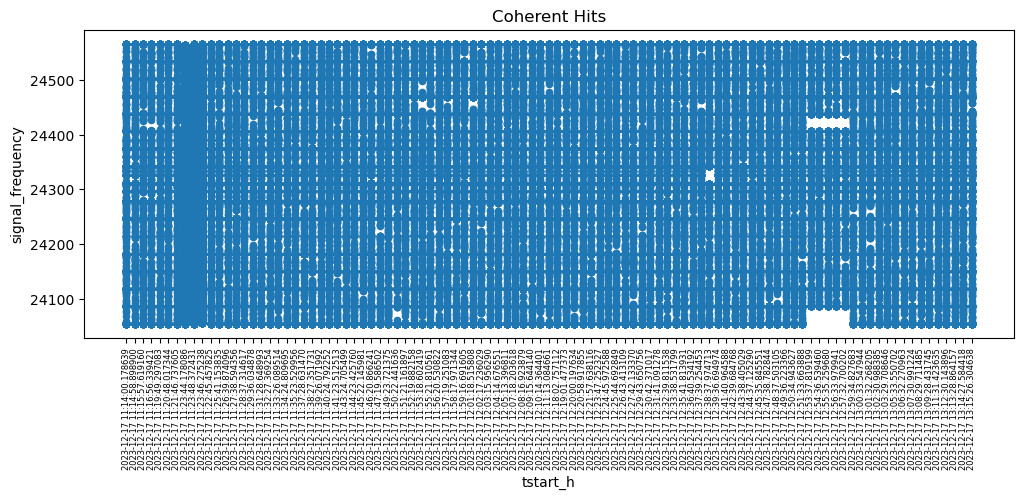

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches
df_small.plot.scatter("tstart_h", "signal_frequency", ax=ax)
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=6)  # Set x-tick font size to 8
plt.title("Coherent Hits")
plt.show()

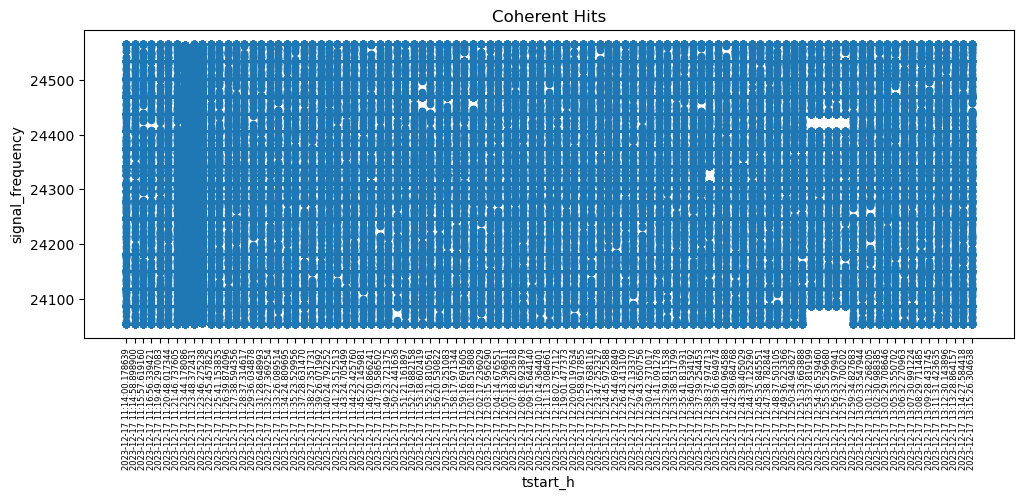

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches
df_small[df_small["source_name"] != "Incoherent"].plot.scatter("tstart_h", "signal_frequency", ax=ax)
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=6)  # Set x-tick font size to 8
plt.title("Coherent Hits")
plt.show()

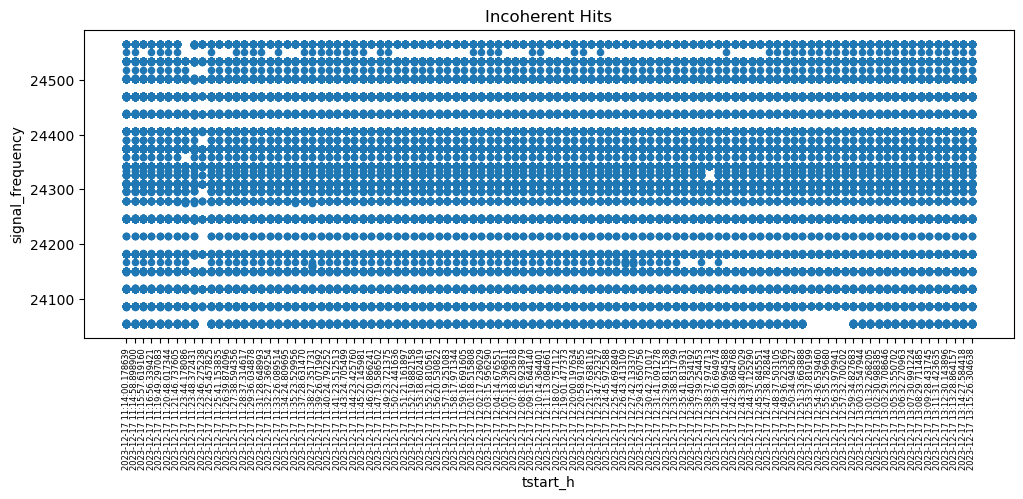

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches
df_small[df_small["source_name"] == "Incoherent"].plot.scatter("tstart_h", "signal_frequency", ax=ax)
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=6)  # Set x-tick font size to 8
plt.title("Incoherent Hits")
plt.show()

In [7]:
# Get rid of |drift rate| < 1 signals
# Get rid of high and low SNR signals also
print(len(df_small))
df_cleaned = df_small[(df_small.signal_drift_rate.abs() > 1) * 
                (df_small.signal_snr < 100) * 
                (df_small.signal_snr > 15)]

print(len(df_cleaned))

240929
80


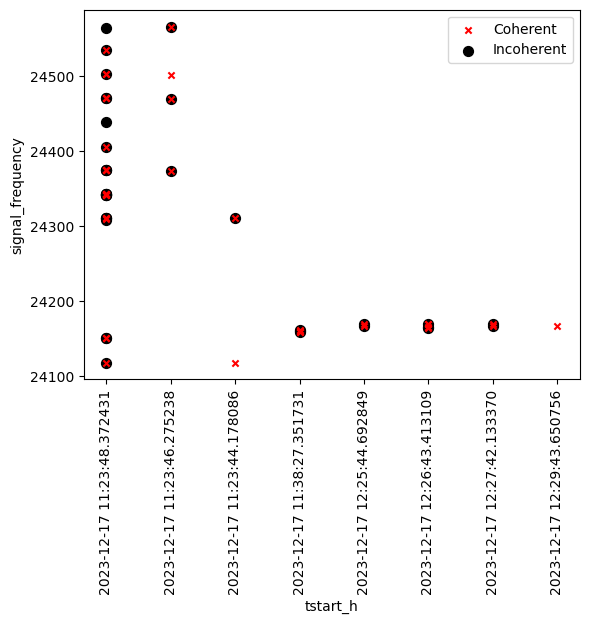

In [8]:
ax = df_cleaned[df_cleaned.source_name != "Incoherent"].plot.scatter("tstart_h", "signal_frequency", color='red', marker='x', label="Coherent")
df_cleaned[df_cleaned.source_name == "Incoherent"].plot.scatter("tstart_h", "signal_frequency", ax=ax, color='black', s=50, zorder=-100, label='Incoherent')
plt.legend()
plt.xticks(rotation=90)
plt.show()

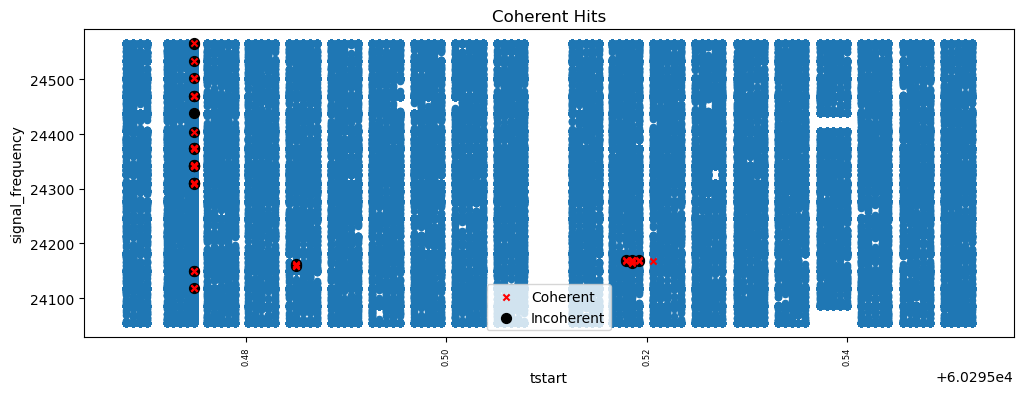

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches

df_cleaned[df_cleaned.source_name != "Incoherent"].plot.scatter("tstart", "signal_frequency", ax=ax, color='red', zorder=10000, marker='x', label="Coherent")
df_cleaned[df_cleaned.source_name == "Incoherent"].plot.scatter("tstart", "signal_frequency", ax=ax, color='black', s=50, zorder=100, label='Incoherent')

df_small.plot.scatter("tstart", "signal_frequency", ax=ax)
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=6)  # Set x-tick font size to 8
plt.title("Coherent Hits")
plt.show()

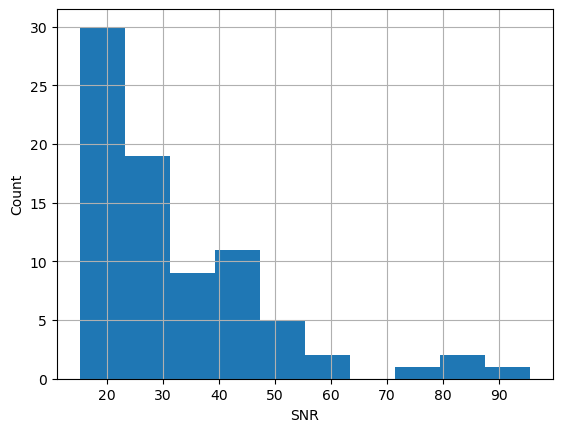

In [10]:
df_cleaned.signal_snr.hist()
plt.xlabel("SNR")
plt.ylabel("Count")
plt.show()

In [11]:
print(df_cleaned.ra_hours.unique())
print(df_cleaned.dec_degrees.unique())

[8.63873333 8.63818611]
[-0.69966 -0.693  ]


In [12]:
df_cleaned.columns

Index(['Unnamed: 0', 'id', 'beam_id', 'observation_id', 'tuning',
       'subband_offset', 'file_uri', 'file_local_enumeration',
       'signal_frequency', 'signal_index', 'signal_drift_steps',
       'signal_drift_rate', 'signal_snr', 'signal_coarse_channel',
       'signal_beam', 'signal_num_timesteps', 'signal_power',
       'signal_incoherent_power', 'source_name', 'fch1_mhz', 'foff_mhz',
       'tstart', 'tsamp', 'ra_hours', 'dec_degrees', 'telescope_id',
       'num_timesteps', 'num_channels', 'coarse_channel', 'start_channel',
       'tstart_h'],
      dtype='object')

In [13]:
df_cleaned.to_csv("/home/nstiegle/BL-COSMIC-2024-proj/candidate/decent_hits.csv")

In [14]:
candidates = pd.read_csv("/home/nstiegle/promising_candidates.csv")

In [21]:
for id in candidates.id:
    if id not in df_cleaned.id.values:
        print(id)